# Discrete distributions


- Definition (Probability Mass Function (PMF))

    - For a discrete random variable $X$ with possible values $x_1, x_2, x_3, \cdots , x_n$, a probability mass function $f(x_i)$ is a function such that:
    
        1. $f(x_i) \geq 0$
        2. $\sum^n_{i=1} f(x_i) = 1$
        3. $f(x_i) = P(X = x_i)$


- Definition (CDF for a discrete random variable)

    - For a discrete random variable $X$, $F(x)$ satisfies the following properties:
        1. $F(x)=P(X \leq x) = \sum_{x_i \leq x} f(x_i)$
        2. $0 \leq F(x) \leq 1$
        3. If $x \leq y$, then $F(x) \leq F(y)$
    - The CDF is defined on the real number line.
    - The CDF is a non-decreasing function of $X$ (*i.e.*, increases or stays constant as $x \to \infty $).


- Expected value and variance of a discrete random variable:

    - The expected value (also called the expectation or mean) of a discrete r.v. $X$ whose distinct possible values are $x_1, x_2, \dots$ is defined by
    $$\mu = E[X] = \sum_{i=1}^n x_i f(x_i)$$

    - The variance is defined as:
    $$\sigma^2 = E[(X − E[X])^2] = \sum_{i=1}^n (x_i - \mu)^2 f(x_i)$$
    
### Ejemplos de Variables Aleatorias Discretas

- V.A. $X$: Número de veces que se obtiene el número 6 al lanzar un dado $N$ veces.
Valores puntuales de toma $X: R(X) = {0,1,2,...N}$.
- V.A. $X$: El precio de cierta acción sube (si sube, $X = 1$, no sube $X = 0$). $R(X) = {0,1}.$
- V.A. $X$: Número de días que transcurren desde el día en que se vence una obligación crediticia y el día en que se cumple con dicha obligación.
$R(X) = {0,1,...,n,...}$.
- V.A. $X$: Número de créditos que un estudiante de P&E1 seleccionado al azar tiene inscritos este semestre
$R(X) = {m, m+1,..., M}$.
- V.A. $X$: Número de hermanos que tiene un estudiante de P&E1 seleccionado al azar.
$R(X) = {0,1,...,N}$.

### Ejemplo introductorio

Una de las variables relevantes en el desempeño de los cajeros automáticos de cierto
banco es el número de cajeros de la competencia situados en un radio de 500 metros a
la redonda del cajero.

De acuerdo con el análisis de información disponible al respecto, se sabe que la variable
aleatoria, $X$, que representa el número de cajeros de la competencia para un cajero
seleccionado al azar, tiene un rango, $R(X)$, donde $R(X) = \{0,1,2,3\}$ y se distribuye como:

| x | Número de observaciones |
|---|----|
| 0 | 4  |
| 1 | 8  |
| 2 | 16 |
| 3 | 12 |

Tenemos que:

$$
f(x)=\begin{cases}0.1, & x = 0\\ 0.2, & x = 1\\
                  0.4, & x = 2 \\
                  0.3, & x = 3 \\
                  0.0, & \text{otherwise}\\
      \end{cases}
$$

Y

$$
F(x)=\left\{\begin{array}{ll}
                  0.0,\ \text{if } x < 0 \\
                  0.1,\ 0 \leq x < 1 \\
                  0.3,\ 1 \leq x < 2  \\
                  0.7,\ 2 \leq x < 3  \\
                  1.0,\ x \geq 3  
                \end{array}
              \right.
$$

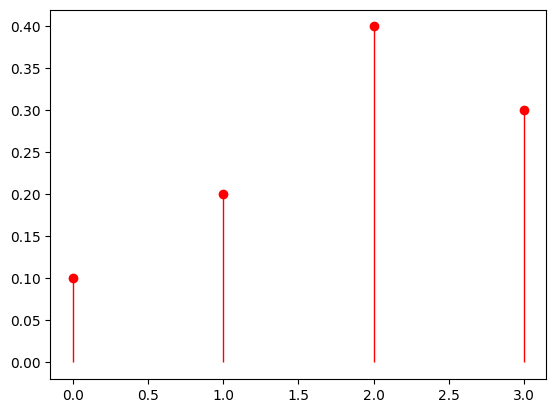

In [45]:
import numpy as np
import matplotlib.pyplot as plt

def plot_pmf(x, pmfx):
    fig, ax = plt.subplots(1, 1)
    ax.vlines(x, 0, pmfx, colors='r', linestyles='-', lw=1)
    ax.plot(x, pmfx, 'ro', label='Pmf')
    plt.show()

x = np.arange(0, 4)
pmfx = np.array([.1, .2, .4, .3])
plot_pmf(x, pmfx)

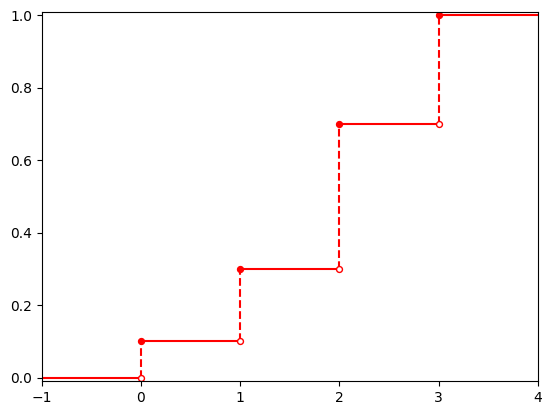

In [46]:
def plot_cdf(rvs_range, cdf_prob):
    yn = np.insert(cdf_prob, 0, 0)
    fig, ax = plt.subplots()
    ax.set_facecolor('white')
    ax.hlines(y=yn, xmin=rvs_range[:-1], xmax=rvs_range[1:],
              color='red', zorder=1)
    ax.vlines(x=rvs_range[1:-1], ymin=yn[:-1], ymax=yn[1:], color='red',
              linestyle='dashed', zorder=1)
    ax.scatter(rvs_range[1:-1], cdf_prob, color='red', s=18, zorder=2)
    ax.scatter(rvs_range[1:-1], yn[:-1], color='white', s=18, zorder=2,
               edgecolor='red')
    ax.grid(False)
    ax.set_xlim(rvs_range[0], rvs_range[-1])
    ax.set_ylim([-0.01, 1.01])
    plt.show()

x = np.arange(-1, 5)
cdfx = np.array([.1, .3, .7, 1.])  # CDF
plot_cdf(x, cdfx)

### Let's generate a rvs from the pmf above

- Calculate $E[X],\ Var[X]$ and contrast simulation with theoretical value

Simulated frequencies [0.096  0.1999 0.4038 0.3003]
E[X] = 1.9 
Var[X] = 0.8900000000000001
Simulated:
Mean = 1.9084 
Var[X] = 0.87580944


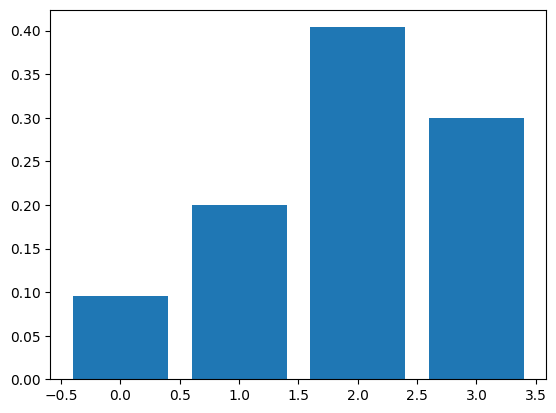

In [47]:
def atm_around(u):
    return np.where(cdf_atm > u)[0][0]

size = 10000
cdf_atm = np.array([.1, .3, .7, 1.])  # CDF
atms = [atm_around(np.random.rand()) for i in range(size)]
unique, counts = np.unique(atms, return_counts=True)
plt.bar(unique, counts / size)
print("Simulated frequencies", counts / size)

x = np.arange(0, 4)
px = np.array([.1, .2, .4, .3])    # PDF
ex = sum(x*px)
vx = sum((x**2)*px) - ex**2
print("E[X] =", ex, "\nVar[X] =", vx)
print("Simulated:\nMean =", np.mean(atms), "\nVar[X] =", np.var(atms))

# Bernoulli distribution


An r.v. $X$ is said to have the Bernoulli distribution with parameter $p$ if
$P(X = 1) = p$ and $P(X = 0) = 1 - p$, where $0 < p < 1$.
We write this as $X \sim Bern(p)$.

The symbol $\sim$ is read "is distributed as".
Any r.v. whose possible values are 0 and 1 has a $Bern(p)$ distribution,
with $p$ the probability of the r.v. equaling 1.
This number $p$ in $Bern(p)$ is called the parameter of the distribution;
it determines which specific Bernoulli distribution we have.
Thus there is not just one Bernoulli distribution,
but rather a family of Bernoulli distributions,
indexed by $p$. For example, if $X \sim Bern(1/3)$,
it would be correct but incomplete to say "$X$ is Bernoulli";
to fully specify the distribution of $X$, we should both say its
name (Bernoulli) and its parameter value (1/3),
which is the point of the notation $X \sim Bern(1/3)$.

**Bernoulli trial**. An experiment that can result in either a "success" or a "failure" (but not both) is called a Bernoulli trial. A Bernoulli random variable can be thought of as the indicator of success in a Bernoulli trial: it equals 1 if success occurs and 0 if failure occurs in the trial.

Because of this story, the parameter p is often called the success probability of the $Bern(p)$ distribution.

### PMF

From the table below:

| $x$ | $P(X=x)$ |   $f_X(x)$   |
|-----|----------|--------------|
|  0  | $1-p$    | $p^0 (1-p)^{1-0}$ |
|  1  | $p$      | $p^1 (1-p)^{1-1}$ |

We can write the PMF as follows:

$$f_X(x; p) = p^x (1-p)^{1-x},\ x \in \{0, 1\}$$

Try to calculate the expected value and variance of the Bernoulli distribution:

$$E[X] = p,\ Var[X] = p (1 - p)$$

### Python simulation

In [48]:
def bernoulli(p=0.5):
    """
    X ~ Bern(p)
    p: prob. de éxito
    Devuelve: x=1, con prob. p,
              0 con prob. 1 - p
    """
    if np.random.rand() < p:
        return 1  # Exito
    else:
        return 0  # Fracaso

print([bernoulli(0.3) for i in range(10)])

[0, 1, 0, 1, 1, 0, 0, 0, 1, 0]


# Binomial distribution


Once we start thinking about Bernoulli trials, it’s hard not to start thinking about what happens when we have more than one Bernoulli trial.

**Binomial distribution**. Suppose that n independent Bernoulli trials
are performed, each with the same success probability $p$. Let $X$ be the number of successes.
The distribution of $X$ is called the Binomial distribution with parameters $n$ and $p$.
We write $X \sim Bin(n,p)$ to mean that $X$ has the Binomial
distribution with parameters $n$ and $p$,
where $n$ is a positive integer and $0 < p < 1.$

Notice that we define the Binomial distribution not by its PMF, but by a story about the type of experiment that could give rise to a random variable with a Binomial distribution. The most famous distributions in statistics all have stories which explain why they are so often used as models for data, or as the building blocks for more complicated distributions.

Thinking about the named distributions first and foremost in terms of their stories has many benefits. It facilitates pattern recognition, allowing us to see when two problems are essentially identical in structure; it often leads to cleaner solutions that avoid PMF calculations altogether; and it helps us understand how the named distributions are connected to one another.
Here it is clear that $Bern(p)$ is the same distribution as $Bin(1, p)$:
the Bernoulli is a special case of the Binomial.

### PMF

Using the story definition of the Binomial, let's find its PMF.

An experiment consisting of $n$ independent Bernoulli trials produces a sequence of successes and failures. The probability of any specific sequence of $x$ successes and $n - x$ failures is $p^x(1 - p)^{n-k}$. There are ${n \choose x}$ such sequences, since we just need to select where the successes are. Therefore, letting $X$ be the number of successes,

$$P(X=x) = {n \choose x} p^x (1-p)^{n-x},\ x \in \{0, 1, \dots, n\}$$

Given a series of $n=3$ Bernoulli trials with success probability $p=0.5$ (coint tossing), the sample space is given by the figuer below:

<img src="https://raw.githubusercontent.com/marsgr6/r-scripts/master/imgs/binom.png" alt="drawing" width="700"/>

Then we can write the PMF as follows:

| $x$    | $P(X=x)$  | $f_X(x)$  |
|--------|-----------|-----------|
| 0   | $1/8$       | ${3 \choose 0} p^0 (1-p)^{3-0}$ |
| 1   | $3/8$       | ${3 \choose 1} p^1 (1-p)^{3-1}$ |
| 2   | $3/8$       | ${3 \choose 2} p^2 (1-p)^{3-2}$ |
| 3   | $1/8$       | ${3 \choose 3} p^3 (1-p)^{3-3}$ |

### Summary

$$X \sim Bin(x; n, p)$$

$$f_X(x; n, p) = {n \choose x} p^x (1-p)^{n-x},\ x \in \{0, 1, \dots, n\}$$

$$E[X] = np,\ Var[X] = n p (1 - p)$$

### Python simulation

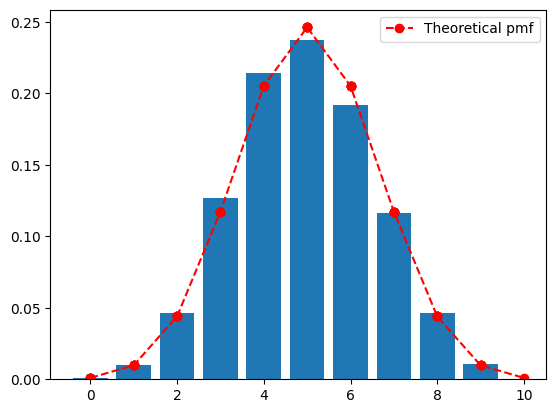

In [49]:
def binomial(n=1, p=0.5):
    x = 0
    for i in range(n):
        x = x + bernoulli(p)
    return x

n, p = 10, 0.5
size = 1000  # sequence length
RVS = [binomial(n, p) for i in range(size)]
unique, counts = np.unique(RVS, return_counts=True)
plt.bar(unique, counts / size)

from scipy.stats import binom
x = np.linspace(0, n, dtype='int')  # variable range
px = binom.pmf(x, n, p)
plt.plot(x, px, '--ro')
l = plt.legend(['Theoretical pmf'])

# Geometric distribution

Consider a sequence of independent Bernoulli trials,
each with the same success probability $p \in (0, 1)$,
with trials performed until a success occurs.
Let $X$ be the number of failures before the first successful trial.
Then $X$ has the Geometric distribution with parameter p;
we denote this by $X \sim Geom(p)$.

For example, if we flip a fair coin until it lands Heads for the first time,
then the number of Tails before the first occurrence of Heads is distributed as $Geom(1/2)$.

### PMF

To get the Geometric PMF from the story, imagine the
Bernoulli trials as a string of 0's (failures) ending in a single 1 (success).
Each 0 has probability $q = 1 - p$ and the final 1 has probability $p$,
so a string of $x$ failures followed by one success has probability $q^x p$.

| $x$| Experiment | $P(X=x)$ | $f_X(x)$ |
|----|------------|----------|----------|
| 0  |  1         | $p$      | $pq^{0}$ |
| 1  |  01        | $qp$     | $pq^{1}$ |
| 2  |  001       | $qqp$    | $pq^{2}$ |
| 3  |  0001      | $qqqp$   | $pq^{3}$ |
|  . |   .        |          |          |
|  . |   .        |          |          |

### Summary

$$X \sim Geom(x; p)$$

$$f_X(x; p) = p (1-p)^{x},\ x \in \{0, 1, 2, \dots \}$$

$$E[X] = \frac{q}{p},\ Var[X] = \frac{q}{p^2},\ q = 1 - p$$

### Python simulation

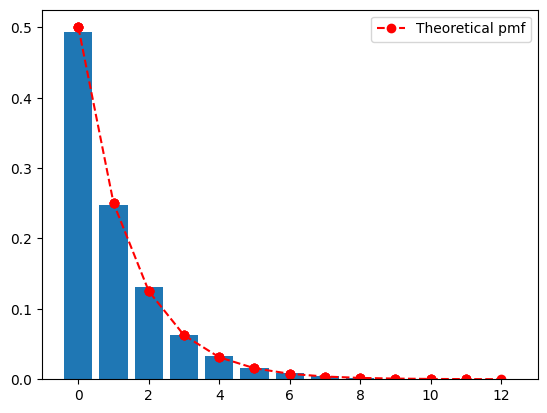

In [50]:
def geometric(p=0.5):
    x = 0
    while not bernoulli(p):
        x = x + 1
    return x

p = 0.5
size = 10000  # sequence length
RVS = [geometric(p) for i in range(size)]
unique, counts = np.unique(RVS, return_counts=True)
plt.bar(unique, counts / size)

from scipy.stats import geom
x = np.linspace(0, max(RVS), dtype='int')  # variable range
px = geom.pmf(x+1, p)
plt.plot(x, px, '--ro')
l = plt.legend(['Theoretical pmf'])

# Negative binomial

In a sequence of independent Bernoulli trials with success probability $p$,
if $X$ is the number of failures before the $r$th success,
then $X$ is said to have the Negative Binomial distribution
with parameters $r$ and $p$,
denoted $X \sim NBin(r, p)$.

Both the Binomial and the Negative Binomial distributions are based on
independent Bernoulli trials;
they differ in the stopping rule and in what they are counting:
the Binomial counts the number of successes in a fixed number of trials,
while the Negative Binomial counts the number of failures
until a fixed number of successes.

In light of these similarities, it comes as no surprise that
the derivation of the Negative Binomial PMF bears a resemblance
to the corresponding derivation for the Binomial.

### PMF

Example for $X \sim NBin(r=2, p=0.5)$:

| $x$ |Experiment | $P(X=x)$ | $f_X(x)$  |
|-----|-----------| ---------|-----------|
|  0  | 11        | $pp$     | ${0 + 2 - 1 \choose 2 - 1} p q^{0}$ |
|  1  | **01**1   | $qpp$    | ${1 + 2 - 1 \choose 2 - 1} p^2 q^{1}$ |
|  2  | **001**1  | $qqpp$   | ${2 + 2 - 1 \choose 2 - 1} p^2 q^{2}$ |
|  3  | **0001**1 | $qqqpp$  | ${3 + 2 - 1 \choose 2 - 1} p^2 q^{3}$ |
|  .  |   .       |          |           |
|  .  |   .       |          |           |

Note that the sequence in the experiment (in bold) can occur in multiple ways. Hence the combination part in the PMF $g_X(x)$ formula.

### Summary

$$X \sim NBin(x; r, p)$$

$$f_X(x; r, p) = {x + r - 1 \choose r - 1} p^r (1-p)^{x},\ x \in \{0, 1, 2, \dots\}$$

$$E[X] = \frac{qr}{p},\ Var[X] = \frac{qr}{p^2}, q=1-p.$$

### Python simulation

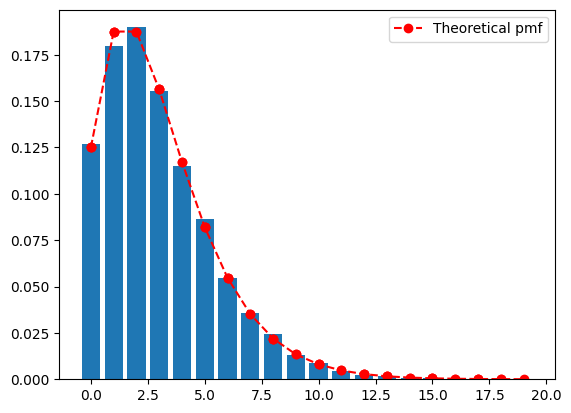

In [51]:
def nbin(r=1, p=0.5):
    x = 0
    for k in range(r):
        x = x + geometric(p)
    return x

r, p = 3, 0.5
size = 10000  # sequence length
RVS = [nbin(r, p) for i in range(size)]
unique, counts = np.unique(RVS, return_counts=True)
plt.bar(unique, counts / size)

from scipy.stats import nbinom
x = np.linspace(0, max(RVS), dtype='int')  # variable range
px = nbinom.pmf(x, r, p)
plt.plot(x, px, '--ro')
l = plt.legend(['Theoretical pmf'])

# Poisson distribution

The Poisson distribution is often used in situations where we are counting the number of successes in a particular region or interval of time, and there are a large number of trials, each with a small probability of success. For example, the following random variables could follow a distribution that is approximately Poisson.

- **The number of emails you receive in an hour.** There are a lot of people who could potentially email you in that hour, but it is unlikely that any specific person will actually email you in that hour. Alternatively, imagine subdividing the hour into milliseconds. There are $3.6\times10^6$ seconds in an hour, but in any specific millisecond it is unlikely that you will get an email.

- **The number of chips in a chocolate chip cookie.** Imagine subdividing the cookie into small cubes; the probability of getting a chocolate chip in a single cube is small, but the number of cubes is large.

- **The number of earthquakes in a year in some region of the world.** At any given time and location, the probability of an earthquake is small, but there are a large number of possible times and locations for earthquakes to occur over the course of the year.

We say that a r.v. has a Poisson distribution denoted by $X \sim Pois(\lambda)$.

The parameter $\lambda$ is interpreted as the rate of
occurrence of these rare events; in the examples above,
$\lambda$ could be 20 (emails per hour), 10 (chips per cookie),
and 2 (earthquakes per year).
The Poisson paradigm says that in applications similar to the ones above,
we can approximate the distribution of the number of events that occur
by a Poisson distribution.

### PMF

- We divide a continuous interval $t$ in $N$ parts of equal width $t/N$.
- The event of observing $x$ successes in a continuous interval $t$,
is equivalent to observing $x$ successes in $N$ Bernoulli experiments.
- The probability of a success $p=\lambda (t/N)$ depends only on the width $t/N$ and a rate of success $\lambda$.

<img src="https://raw.githubusercontent.com/marsgr6/r-scripts/master/imgs/line_plot.png" alt="drawing" width="500"/>

- From the binomial distribtuion we have that:
$$bin(x; N, \lambda (t/N)) = {N \choose x} \left(\frac{\lambda t}{N}\right)^x \cdot
\left(1 - \frac{\lambda t}{N}\right)^{N-x}$$

- We want to assure that only one success can occur in each subdivision of $t$,
this happens when $N \to \infty$. The we solve the following:

$$ \lim_{N \to \infty} \left[ {N \choose x} \left(\frac{\lambda t}{N}\right)^x \cdot
\left(1 - \frac{\lambda t}{N}\right)^{N-x} \right]$$

- We can rewrite the combination and the expression may be disassembled for the purpose of taking limits in the component parts:

$$ \lim_{N \to \infty} \left[ \frac{N!}{(N-x)! x!} \left(\frac{\lambda t}{N}\right)^x \cdot
\left(1 - \frac{\lambda t}{N}\right)^{N-x} \right]$$

$$ \frac{(\lambda t)^x}{x!} \cdot
\lim_{N \to \infty} \left[
\frac{N!}{(N-x)!N^x}
\right] \cdot
\lim_{N \to \infty} \left[
\left(1-\frac{\lambda t}{N}\right)^N \right] \cdot
\lim_{N \to \infty} \left[\left(1-\frac{\lambda t}{N}\right)^{-x}
\right]
$$

$$
\lim_{N \to \infty} \left[
\frac{N!}{(N-x)!N^x}
\right] =
\lim_{N \to \infty} \left[
\frac{N(N-1)\cdots(N-x+1)}{N^x}
\right] = 1
$$

$$
\lim_{N \to \infty}
\left[
\left(1-\frac{\lambda t}{N}\right)^N
\right] = e^{-\lambda t}
$$

$$
\lim_{N \to \infty}
\left[
{\left(1-\frac{\lambda t}{N}\right)^{-x}}
\right] = 1.
$$

On reassembling the parts, it is found that the the binomial function has a
limiting form of:

$$
\lim_{N \to \infty} bin(x;N,\lambda (t/N)) = \frac{(\lambda t)^x}{x!} e^{-\lambda t}
$$

Usually we use $t=1$, but if $\lambda$ is constant over the continuous interval,
we might use
$t \geq 1$.

### Summary

$$
X \sim Poiss(x; \lambda)
$$

$$
f_X(x; \lambda) = \frac{e^{-\lambda} \lambda^x}{x!},\ x \in \{0, 1, 2, \dots\}
$$

$$
E[X] = \lambda,\ Var[X] = \lambda
$$

### Python simulation

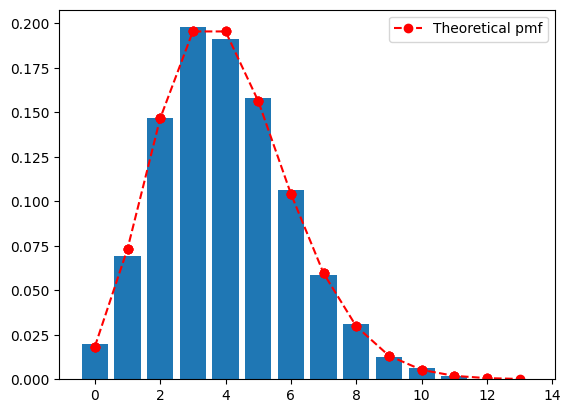

In [52]:
def poiss(lam):
    u = np.random.rand()
    cp = np.exp(-lam)
    k = 0
    factorial_k = 1
    while cp < u:
        k = k + 1
        factorial_k = factorial_k * k
        cp = cp + np.exp(-lam) * lam**k / factorial_k
    return k

lam = 4
size = 10000  # sequence length
RVS = [poiss(lam) for i in range(size)]
unique, counts = np.unique(RVS, return_counts=True)
plt.bar(unique, counts / size)

from scipy.stats import poisson
x = np.linspace(0, max(RVS), dtype='int')  # variable range
px = poisson.pmf(x, lam)
plt.plot(x, px, '--ro')
l = plt.legend(['Theoretical pmf'])

# Hypergeometric distribution

If we have an urn filled with $w$ white and $b$ black balls,
then drawing $n$ balls out
of the urn with replacement yields a $Bin(n, w/(w + b))$ distribution
for the number of white balls obtained in $n$ trials,
since the draws are independent Bernoulli trials,
each with probability $w/(w+b)$ of success.
If we instead sample without replacement,
then the number of white balls follows a
**Hypergeometric distribution**.

**Hypergeometric story.** An urn contains $w = 6$ white balls and $b = 4$ black balls. We
sample $n = 5$ without replacement. The number $X$ of white balls in the sample is
Hypergeometric; here we observe $X = 3$.

![](https://i.imgur.com/jGp0QIZ.png)

Consider an urn with $w$ white balls and $b$ black balls.
We draw $n$ balls out of the urn at random without replacement,
such that all $\binom{w+b}{n}$ samples are equally likely.
Let $X$ be the number of white balls in the sample.
Then $X$ is said to have the \textbf{Hypergeometric distribution}
with parameters $w, b$, and $n$; we denote this by
$X \sim \text{HGeom}(w, b, n),\
P(X=k)=\frac{\binom{w}{k}\binom{b}{n-k}}{\binom{w+b}{n}}$.

- If $X \sim \text{HGeom}(K, N, n)$, then the PMF
of $X$ is
$$
f_X(k; K, N, n) = P(X=k)=\frac{\dbinom{K}{k}\dbinom{N-K}{n-k}}{\dbinom{N}{n}}
$$
for integers $k$ satisfying $0 \leq k \leq K$ and
$0 \leq n-k \leq N-K$,
and $P(X=k)=0$ otherwise. That is, support: $k\in \{max(0,n+K-N),\dots,min(n,K)\}$.
- The mean and variance of the hypergeometric distribution are
$$
\mu=\frac{nK}{N}, \quad \sigma^2=n\frac{K}{N}\frac{(N-K)}{N}\frac{N-n}{N-1}
$$

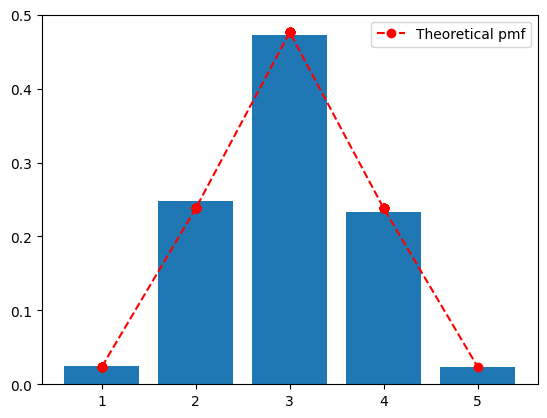

In [53]:
def urna(w, b, n):
    """
    w: number of white balls
    b: number of black balls
    n: sample size (without replacement)
    returns a string containing the sample of size n
    """
    bolas = 'w' * w + 'b' * b
    bL = [b for b in bolas]
    np.random.shuffle(bL)
    return ''.join(bL)[:n]


def sim_urna(w, b, n, rep):
    """
    Simulates urna sampling for a given number of
    repetitions (rep)
    returns a sequence containing the counts for the white balls
    """
    R = []
    for i in range(rep):
        R.append(urna(w, b, n).count('w'))
    return R

RVS = sim_urna(6, 4, 5, 10000)
unique, counts = np.unique(RVS, return_counts=True)
plt.bar(unique, counts / size)

from scipy.stats import hypergeom
x = np.linspace(min(RVS), max(RVS), dtype='int')  # variable range
px = hypergeom.pmf(x, 10, 6, 5)
plt.plot(x, px, '--ro')
l = plt.legend(['Theoretical pmf'])

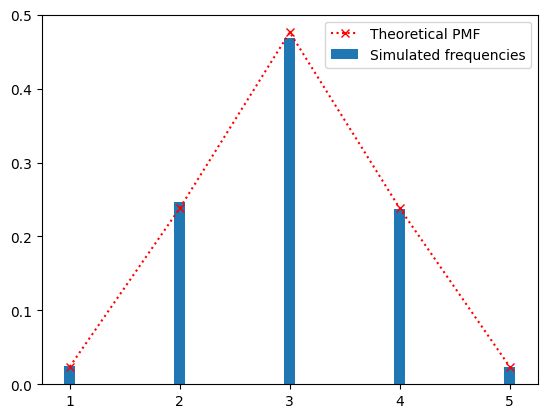

In [54]:
def hgeom(K, N, n):
    # K: white balls
    # N: total balls
    # n: sample size
    urn = K*[1] + (N-K)*[0]  # urn, 1: white, 0: black
    np.random.shuffle(urn)  # urn shuffle
    return sum(urn[:n])

K = 6  # white balss, n in python
N = 10  # Total balls, M in python
n = 5  # sample size, N in python
X = np.array([hgeom(K, N, n) for i in range(10000)])  # random vector
x, fx = np.unique(X, return_counts=True)  # count of unique values and frequencies
bp = plt.bar(x, fx/sum(fx), width=0.1, label="Simulated frequencies")  # barplot
plt.plot(x, hypergeom.pmf(x, n=K, N=n, M=N), ':xr', label="Theoretical PMF")  # Python implementation
l = plt.legend()

**Assignment 1:** For all the **discrete distributions** above, use the scipy.stats function to generate a random variate vector, and plot the theoretical pmf to compare with the generated frequencies. You can go to the wiki page of each distribution to replicate for the **parameters** given in the examples. Or go to the slides: https://drive.google.com/file/d/0B-dmEvN59Z2ZOF9US1RxcVRyQnc/view, and try the examples and excercises.
1. Generate RVS and plot bar graph with relative frequencies
2. Plot theoretical PMF and compare with bar diagram
3. Calculate theoretical E[X] and Var[X] and compare with sample mean and variance of RVS
4. Calculate cumulative frequencies of RVS in point **(1)**
5. Plot theoretical CDF and compare with point **(4)**

>>>>>>>>>> DISTRIBUCION GEOMETRICA <<<<<<<<<<


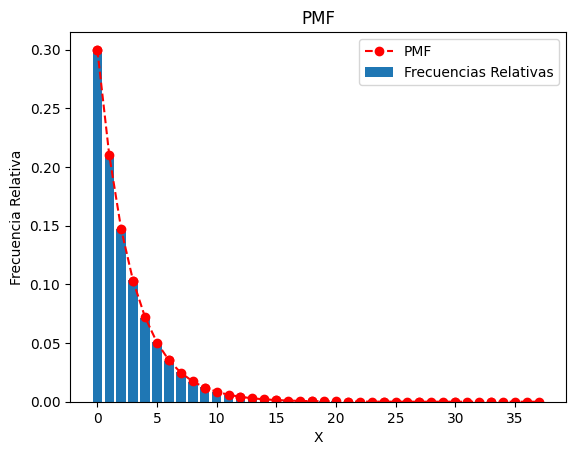

Varianza Teórica: 7.777777777777778, Varianza: 7.777777777777779


Media Teórica: 3.3333333333333335, Media: 3.3333333333333335


Lista Suma Acumulada Counts/Size:  [0.29936 0.50935 0.65657 0.76059 0.83189 0.88292 0.91803 0.94303 0.96009
 0.97226 0.98082 0.98642 0.99072 0.99343 0.99563 0.99694 0.99786 0.99849
 0.9989  0.99925 0.99944 0.99962 0.99977 0.99984 0.99989 0.99992 0.99993
 0.99994 0.99995 0.99996 0.99998 0.99999 1.     ]
Suma Acumulada Counts/Size:  0.9999999999999998


Lista Suma Acumulada Px Teorico:  [0.3        0.447      0.51903    0.51914729 0.51920477 0.52513675
 0.52613374 0.52613453 0.52613785 0.52613898 0.52614574 0.52905241
 0.52905473 0.530479   0.5304928  0.54259888 0.54259944 0.56730573
 0.56779425 0.57626851 0.5769664  0.7869664  0.8222611  0.83955551
 0.83956517 0.83964727 0.8396875  0.83968913 0.83992851 0.94282851
 0.99324951 0.99341707 0.99375904 0.99376377 0.99378348 0.99793587
 0.99997054 0.9999987 ]
Suma Acumulada Px Teorico:  0.9999987006518853


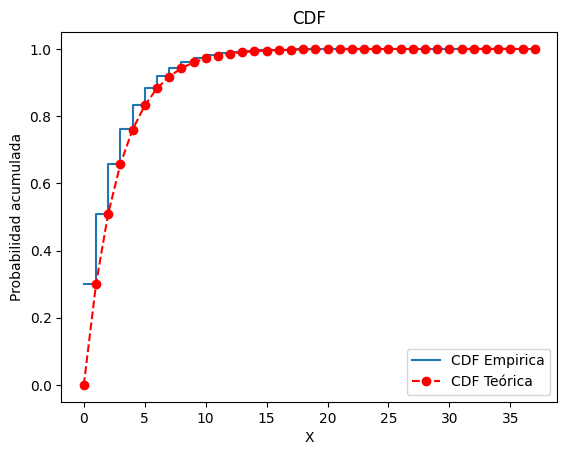

In [55]:
# GEOMETRICA 
print ('>>>>>>>>>> DISTRIBUCION GEOMETRICA <<<<<<<<<<')


#Punto 1 ------------------------------------------------------
p = 0.3
size = 100000  # sequence length
RVS = [geometric(p) for i in range(size)]
unique, counts = np.unique(RVS, return_counts=True)
plt.bar(unique, counts / size, label='Frecuencias Relativas')


#Punto 2 ------------------------------------------------------
x_theoretical = np.linspace(0, max(RVS), dtype='int')
px_theoretical = geom.pmf(x_theoretical + 1, p)
plt.plot(x_theoretical, px_theoretical, '--ro', label='PMF')
# Add labels and legend
plt.xlabel('X')
plt.ylabel('Frecuencia Relativa')
plt.title('PMF')
plt.legend()
# Display the plot
plt.show()

#Punto 3 ------------------------------------------------------
theoretical_mean = 1/p
theoretical_variance = (1-p)/p**2

sample_mean = geom.mean(p)
sample_variance = geom.var(p)

print(f'Varianza Teórica: {theoretical_variance}, Varianza: {sample_variance}')
print(f'\n\nMedia Teórica: {theoretical_mean}, Media: {sample_mean}')


#Punto 4 ------------------------------------------------------
i = 0
cumulative_counts = np.cumsum(counts / size)
print("\n\nLista Suma Acumulada Counts/Size: ",cumulative_counts)
print("Suma Acumulada Counts/Size: ", max(cumulative_counts))
plt.step(unique, cumulative_counts, label='CDF Empirica', where='post')

px_theoretical_1 = list(set(px_theoretical))
print("\n\nLista Suma Acumulada Px Teorico: ", np.cumsum(px_theoretical_1))
print("Suma Acumulada Px Teorico: ", max(np.cumsum(px_theoretical_1)))


#Punto 5 ----------------------------------
x_cdf_theoretical = np.arange(0, max(RVS) + 1)
cdf_theoretical = geom.cdf(x_cdf_theoretical, p)
plt.plot(x_cdf_theoretical, cdf_theoretical, '--ro', label='CDF Teórica')
plt.xlabel('X')
plt.ylabel('Probabilidad acumulada')
plt.title('CDF')
plt.legend()

# Display the plot
plt.show()


>>>>>>>>>> DISTRIBUCION DE POISSON <<<<<<<<<<


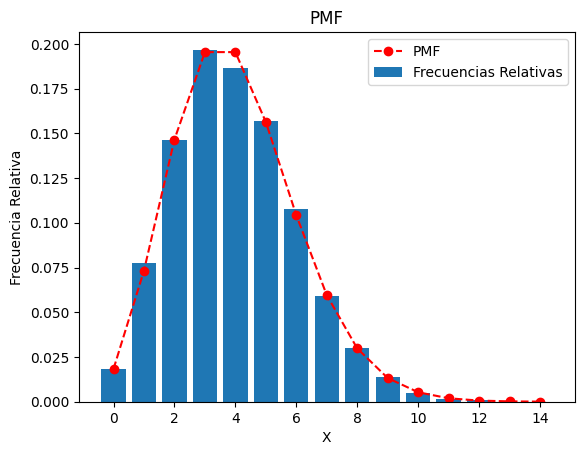

Media Teórica: 3.992, Media: 4.0
Varianza Teórica: 4.053135999999999, Varianza: 4.0


Lista Suma Acumulada Counts/Size:  [0.0185 0.0961 0.2423 0.439  0.6254 0.782  0.8896 0.9485 0.9785 0.9923
 0.9972 0.9988 0.9999 1.    ]
Suma Acumulada Counts/Size:  1.0000000000000002


Lista Suma Acumulada Px Teorico:  [0.01831564 0.09157819 0.23810331 0.43347012 0.62883694 0.78513039
 0.88932602 0.94886638 0.97863657 0.99186776 0.99716023 0.99908477
 0.99972628 0.99992367 0.99998007]
Suma Acumulada Px Teorico:  0.9999800682725171


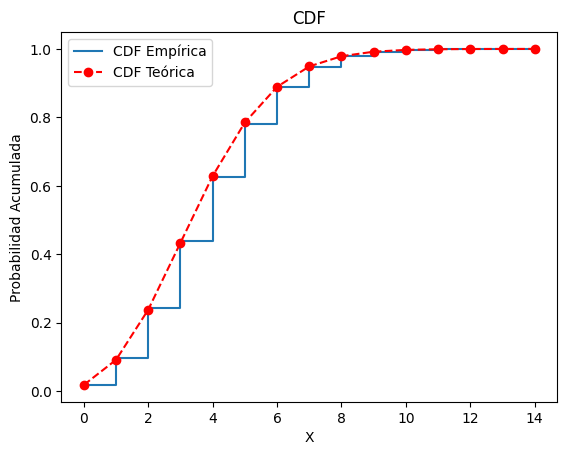

In [56]:
#POISSON 
print('>>>>>>>>>> DISTRIBUCION DE POISSON <<<<<<<<<<')
#Punto 1 ------------------------------------------------------
lam = 4
size = 10000  # sequence length
RVS = [poiss(lam) for i in range(size)]
unique, counts = np.unique(RVS, return_counts=True)
plt.bar(unique, counts / size, label='Frecuencias Relativas')

#Punto 2 ------------------------------------------------------
x_theoretical = np.arange(0, max(RVS) + 1)
px_theoretical = poisson.pmf(x_theoretical, lam)
plt.plot(x_theoretical, px_theoretical, '--ro', label='PMF')
plt.xlabel('X')
plt.ylabel('Frecuencia Relativa')
plt.title('PMF')
plt.legend()
plt.show()

#Punto 3 ------------------------------------------------------
theoretical_mean = np.mean(RVS)
theoretical_variance = np.var(RVS)
#AQUI ES IMPORTANTE RECALCAR QUE LAM SU VARIANCIA Y MEDIA SIEMPRE SON IGUAL A LAM

sample_mean = poisson.mean(lam)
sample_variance = poisson.var(lam)

print(f'Media Teórica: {theoretical_mean}, Media: {sample_mean}')
print(f'Varianza Teórica: {theoretical_variance}, Varianza: {sample_variance}')

#Punto 4 ------------------------------------------------------
cumulative_counts = np.cumsum(counts / size)
print("\n\nLista Suma Acumulada Counts/Size: ",cumulative_counts)
print("Suma Acumulada Counts/Size: ", max(cumulative_counts))
plt.step(unique, cumulative_counts, label='CDF Empírica', where='post')
print("\n\nLista Suma Acumulada Px Teorico: ", np.cumsum(px_theoretical))
print("Suma Acumulada Px Teorico: ", max(np.cumsum(px_theoretical)))

#Punto 5 ------------------------------------------------------
x_cdf_theoretical = np.arange(0, max(RVS) + 1)
cdf_theoretical = poisson.cdf(x_cdf_theoretical, lam)
plt.plot(x_cdf_theoretical, cdf_theoretical, '--ro', label='CDF Teórica')
plt.xlabel('X')
plt.ylabel('Probabilidad Acumulada')
plt.title('CDF')
plt.legend()
plt.show()

>>>>>>>>>> DISTRIBUCION DE BERNOULLI <<<<<<<<<<


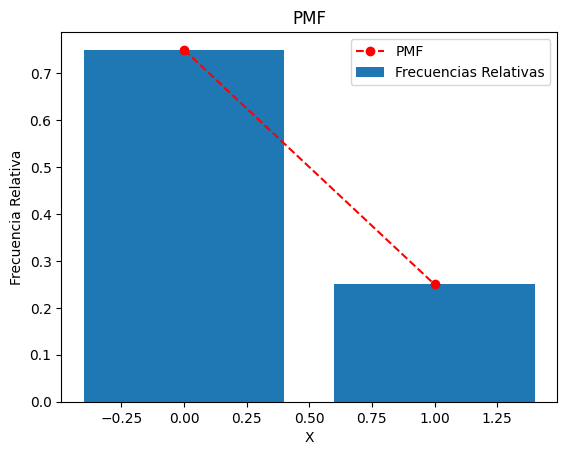

Media Teórica: 0.25, Media: 0.25
Varianza Teórica : 0.1875, Varianza: 0.1875


Lista Suma Acumulada Counts/Size:  [0.7496 1.    ]
Suma Acumulada Counts/Size:  1.0


Lista Suma Acumulada Px Teorico:  [0.75 1.  ]
Suma Acumulada Px Teorico:  1.0


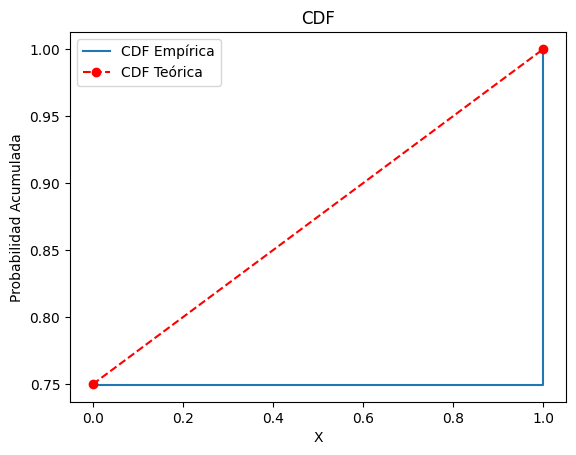

In [57]:
import numpy as np
from scipy.stats import bernoulli
import matplotlib.pyplot as plt

print('>>>>>>>>>> DISTRIBUCION DE BERNOULLI <<<<<<<<<<')

# Punto 1 ------------------------------------------------------

# Generate Random Variates (RVS) and plot bar graph with relative frequencies
size = 10000
p = 0.25
RVS = bernoulli.rvs(p, size=size)
unique, counts = np.unique(RVS, return_counts=True)
plt.bar(unique, counts / size, label='Frecuencias Relativas')

# Punto 2 ------------------------------------------------------

# Plot theoretical PMF and compare with bar diagram
x_theoretical = np.array([0, 1])
px_theoretical = bernoulli.pmf(x_theoretical, p)
plt.plot(x_theoretical, px_theoretical, '--ro', label='PMF')
plt.xlabel('X')
plt.ylabel('Frecuencia Relativa')
plt.title('PMF')
plt.legend()
plt.show()

# Punto 3 ------------------------------------------------------
# Calculate theoretical E[X] and Var[X] and compare with sample mean and variance of RVS
theoretical_mean = p
theoretical_variance = p*(1-p)

sample_mean = bernoulli.mean(p)
sample_variance = bernoulli.var(p)

print(f'Media Teórica: {theoretical_mean}, Media: {sample_mean}')
print(f'Varianza Teórica : {theoretical_variance}, Varianza: {sample_variance}')

# Punto 4 ------------------------------------------------------
# Calculate cumulative frequencies of RVS
cumulative_counts = np.cumsum(counts / size)
print("\n\nLista Suma Acumulada Counts/Size: ",cumulative_counts)
print("Suma Acumulada Counts/Size: ", max(cumulative_counts))
plt.step(unique, cumulative_counts, label='CDF Empírica', where='post')
print("\n\nLista Suma Acumulada Px Teorico: ", np.cumsum(px_theoretical))
print("Suma Acumulada Px Teorico: ", max(np.cumsum(px_theoretical)))


# Punto 5 ------------------------------------------------------
# Plot CDF
x_cdf_theoretical = np.array([0, 1])
cdf_theoretical = bernoulli.cdf(x_cdf_theoretical, p)
plt.plot(x_cdf_theoretical, cdf_theoretical, '--ro', label='CDF Teórica')
plt.xlabel('X')
plt.ylabel('Probabilidad Acumulada')
plt.title('CDF')
plt.legend()
plt.show()



>>>>>>>>>> DISTRIBUCION BINOMIAL <<<<<<<<<<


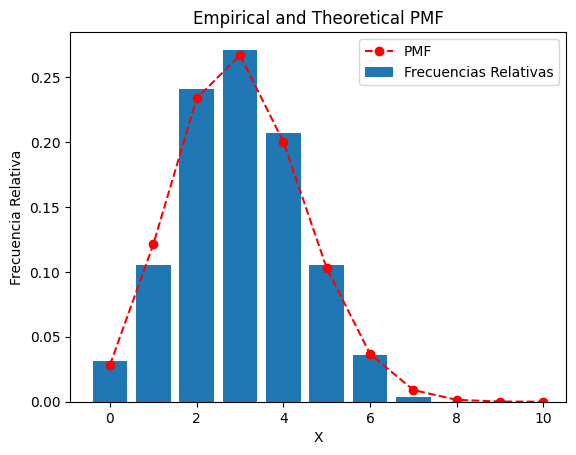

Theoretical Mean: 3.0000, Sample Mean: 3.0000
Theoretical Variance: 2.1000, Sample Variance: 2.1000


Lista Suma Acumulada Counts/Size:  [0.031 0.136 0.377 0.648 0.855 0.96  0.996 1.   ]
Suma Acumulada Counts/Size:  1.0


Lista Suma Acumulada Px Teorico:  [0.02824752 0.14930835 0.38278279 0.64961072 0.84973167 0.95265101
 0.98940792 0.99840961 0.99985631 0.9999941  1.        ]
Suma Acumulada Px Teorico:  0.9999999999999996


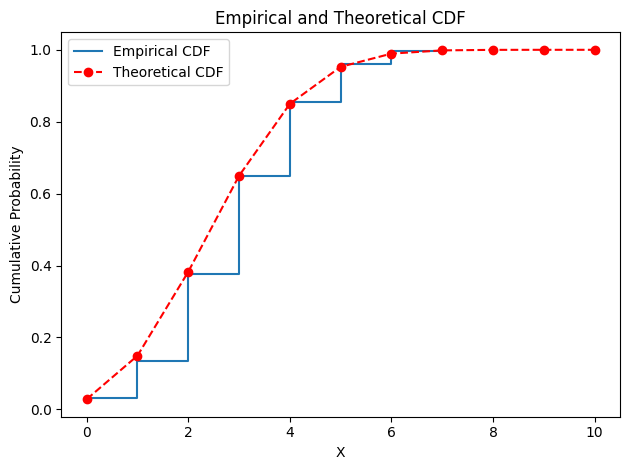

In [63]:
#BINOMIAL 

print('>>>>>>>>>> DISTRIBUCION BINOMIAL <<<<<<<<<<')
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import binom  # Add this line

def bernoulli(p=0.5):
    return 1 if np.random.rand() < p else 0

def binomial(n=1, p=0.5):
    x = 0
    for i in range(n):
        x = x + bernoulli(p)
    return x

#Punto 1 ------------------------------------------------------
# Generate Random Variates (RVS) and plot bar graph with relative frequencies
n, p = 10, 0.3
size = 1000
RVS = [binomial(n, p) for i in range(size)]
unique, counts = np.unique(RVS, return_counts=True)
plt.bar(unique, counts / size, label='Frecuencias Relativas')

# Plot theoretical PMF and compare with bar diagram

#Punto 2 ------------------------------------------------------
x_theoretical = np.arange(0, n+1)
px_theoretical = binom.pmf(x_theoretical, n, p)
plt.plot(x_theoretical, px_theoretical, '--ro', label='PMF')
plt.xlabel('X')
plt.ylabel('Frecuencia Relativa')
plt.title('Empirical and Theoretical PMF')
plt.legend()
plt.show()

#Punto 3 ------------------------------------------------------
# Calculate theoretical E[X] and Var[X] and compare with sample mean and variance of RVS
theoretical_mean = n * p
theoretical_variance = n * p * (1 - p)

sample_mean = binom.mean(n, p)  # Fix this line
sample_variance = binom.var(n, p)  # Fix this line

print(f'Theoretical Mean: {theoretical_mean:.4f}, Sample Mean: {sample_mean:.4f}')
print(f'Theoretical Variance: {theoretical_variance:.4f}, Sample Variance: {sample_variance:.4f}')

#Punto 4 ------------------------------------------------------
# Calculate cumulative frequencies of RVS
cumulative_counts = np.cumsum(counts / size)
print("\n\nLista Suma Acumulada Counts/Size: ",cumulative_counts)
print("Suma Acumulada Counts/Size: ", max(cumulative_counts))
plt.step(unique, cumulative_counts, label='Empirical CDF', where='post')

print("\n\nLista Suma Acumulada Px Teorico: ", np.cumsum(px_theoretical))
print("Suma Acumulada Px Teorico: ", max(np.cumsum(px_theoretical)))

#Punto 5 ------------------------------------------------------
# Plot theoretical CDF and compare with point
x_cdf_theoretical = np.arange(0, n+1)
cdf_theoretical = binom.cdf(x_cdf_theoretical, n, p)
plt.plot(x_cdf_theoretical, cdf_theoretical, '--ro', label='Theoretical CDF')
plt.xlabel('X')
plt.ylabel('Cumulative Probability')
plt.title('Empirical and Theoretical CDF')
plt.legend()

# Adjust layout for better visualization
plt.tight_layout()

# Display the plots
plt.show()


>>>>>>>>>> DISTRIBUCION BINOMIAL <<<<<<<<<<


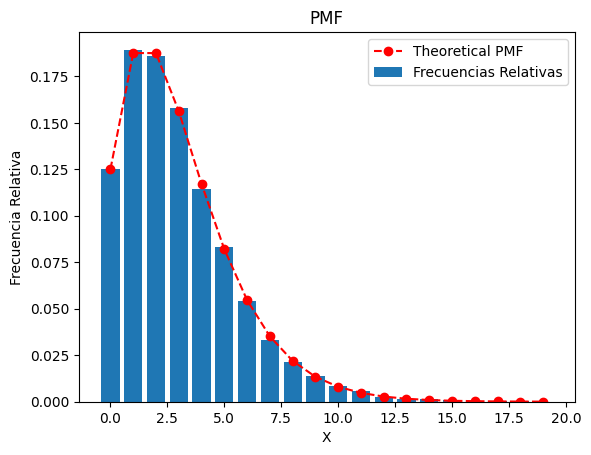

Theoretical Mean: 3.0000, Sample Mean: 3.0000
Theoretical Variance: 6.0000, Sample Variance: 6.0000


Lista Suma Acumulada Counts/Size:  [0.1251 0.3144 0.5001 0.6583 0.7726 0.8556 0.91   0.9434 0.965  0.9788
 0.9872 0.9929 0.9956 0.9969 0.9983 0.999  0.9994 0.9997 0.9999 1.    ]
Suma Acumulada Counts/Size:  0.9999999999999998


Lista Suma Acumulada Px Teorico:  [0.125      0.3125     0.5        0.65625    0.7734375  0.85546875
 0.91015625 0.9453125  0.96728516 0.98071289 0.98876953 0.99353027
 0.99630737 0.99790955 0.99882507 0.99934387 0.9996357  0.99979877
 0.99988937 0.99993944]
Suma Acumulada Px Teorico:  0.9999394416809081


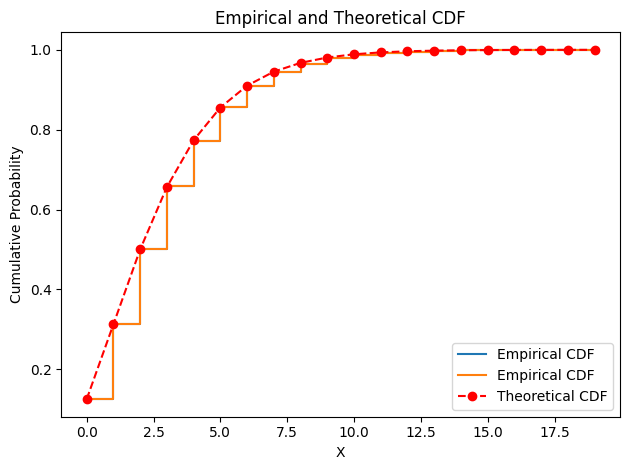

In [59]:
#NEGATIVE BINOMIAL FALTA CORREGIR
print('>>>>>>>>>> DISTRIBUCION BINOMIAL <<<<<<<<<<')
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import nbinom

def geometric(p=0.5):
    x = 0
    while np.random.rand() >= p:
        x += 1
    return x

def nbin(r=1, p=0.5):
    x = 0
    for k in range(r):
        x += geometric(p)
    return x

#Punto 1 ------------------------------------------------------
# Generate Random Variates (RVS) and plot bar graph with relative frequencies
r, p = 3, 0.5
size = 10000
RVS = [nbin(r, p) for i in range(size)]
unique, counts = np.unique(RVS, return_counts=True)
plt.bar(unique, counts / size, label='Frecuencias Relativas')


# Plot empirical Relative Frequencies

#Punto 2 ------------------------------------------------------
x_theoretical = np.arange(0, max(RVS)+1)
px_theoretical = nbinom.pmf(x_theoretical, r, p)
plt.plot(x_theoretical, px_theoretical, '--ro', label='Theoretical PMF')
plt.xlabel('X')
plt.ylabel('Frecuencia Relativa')
plt.title('PMF')
plt.legend()
plt.show()

#Punto 3 ------------------------------------------------------
# Calculate theoretical E[X] and Var[X] and compare with sample mean and variance of RVS
theoretical_mean = r * (1-p) / p
theoretical_variance = r * (1-p) / p**2

sample_mean = nbinom.mean(r, p)
sample_variance = nbinom.var(r, p)

print(f'Theoretical Mean: {theoretical_mean:.4f}, Sample Mean: {sample_mean:.4f}')
print(f'Theoretical Variance: {theoretical_variance:.4f}, Sample Variance: {sample_variance:.4f}')


#Punto 4 ------------------------------------------------------
# Calculate cumulative frequencies of RVS
cumulative_counts = np.cumsum(counts / size)
print("\n\nLista Suma Acumulada Counts/Size: ",cumulative_counts)
print("Suma Acumulada Counts/Size: ", max(cumulative_counts))
plt.step(unique, cumulative_counts, label='Empirical CDF', where='post')

print("\n\nLista Suma Acumulada Px Teorico: ", np.cumsum(px_theoretical))
print("Suma Acumulada Px Teorico: ", max(np.cumsum(px_theoretical)))


#Punto 5 ------------------------------------------------------
# Plot theoretical CDF and compare with point
x_cdf_theoretical = np.arange(0, max(RVS)+1)
cdf_theoretical = nbinom.cdf(x_cdf_theoretical, r, p)
plt.step(unique, cumulative_counts, label='Empirical CDF', where='post')
plt.plot(x_cdf_theoretical, cdf_theoretical, '--ro', label='Theoretical CDF')
plt.xlabel('X')
plt.ylabel('Cumulative Probability')
plt.title('Empirical and Theoretical CDF')
plt.legend()

# Adjust layout for better visualization
plt.tight_layout()

# Display the plots
plt.show()


>>>>>>>>>> DISTRIBUCION HIPERGEOMETRICA <<<<<<<<<<


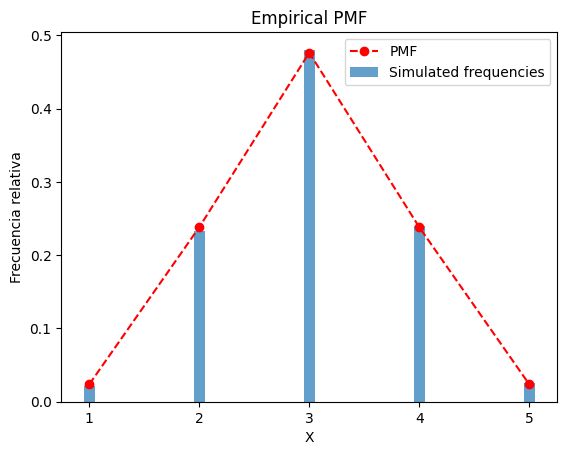

Theoretical Mean: 3.0000, Sample Mean: 3.0000
Theoretical Variance: 0.6667, Sample Variance: 0.6667


Lista Suma Acumulada Counts/Size:  [0.0216 0.2545 0.7347 0.9744 1.    ]
Suma Acumulada Counts/Size:  1.0


Lista Suma Acumulada Px Teorico:  [0.02380952 0.26190476 0.73809524 0.97619048 1.        ]
Suma Acumulada Px Teorico:  1.0


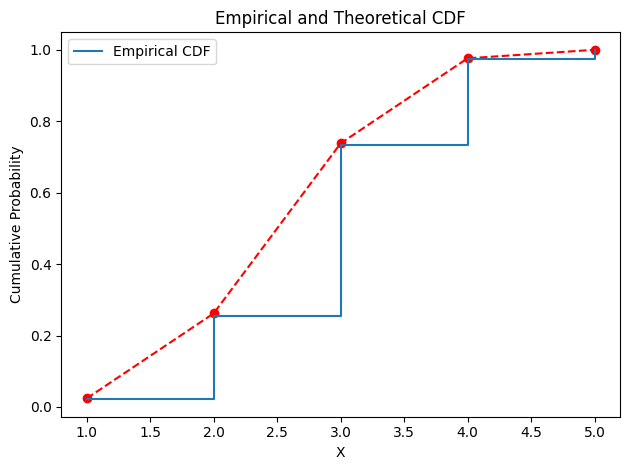

In [60]:
#HYPERGEOMETRIC 
print('>>>>>>>>>> DISTRIBUCION HIPERGEOMETRICA <<<<<<<<<<')
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import hypergeom

# Function to generate Random Variates (RVS) and plot bar graph with relative frequencies
def hgeom(K, N, n):
    urn = K * [1] + (N - K) * [0]  # urn, 1: white, 0: black
    np.random.shuffle(urn)  # urn shuffle
    return sum(urn[:n])


#Punto 1 ------------------------------------------------------
# Generate Random Variates (RVS)
K, N, n = 6, 10, 5
size = 10000
X = np.array([hgeom(K, N, n) for i in range(size)])  # random vector
x, fx = np.unique(X, return_counts=True)  # count of unique values and frequencies
plt.bar(x, fx / sum(fx), width=0.1, alpha=0.7, label="Simulated frequencies")


#Punto 2 ------------------------------------------------------
x_theoretical = np.arange(min(x), max(x) + 1)
px_theoretical = hypergeom.pmf(x_theoretical, N, K, n)
plt.plot(x_theoretical, px_theoretical, '--ro', label='PMF')
plt.xlabel('X')
plt.ylabel('Frecuencia relativa')
plt.title('Empirical PMF')
plt.legend()
plt.show()

#Punto 3 ------------------------------------------------------
# Calculate theoretical E[X] and Var[X] and compare with sample mean and variance of RVS
theoretical_mean = n * (K / N)
theoretical_variance = n * (K / N) * ((N - K) / N) * ((N - n) / (N - 1))

#sample_mean1 = hypergeom.mean(N, K, n)
sample_mean = hypergeom.mean(N, K, n)
sample_variance = hypergeom.var(N, K, n)

print(f'Theoretical Mean: {theoretical_mean:.4f}, Sample Mean: {sample_mean:.4f}')
print(f'Theoretical Variance: {theoretical_variance:.4f}, Sample Variance: {sample_variance:.4f}')

#Punto 4 -------------------------------------------------------
# Calculate cumulative frequencies of RVS
cumulative_counts = np.cumsum(fx / sum(fx))
print("\n\nLista Suma Acumulada Counts/Size: ",cumulative_counts)
print("Suma Acumulada Counts/Size: ", max(cumulative_counts))

print("\n\nLista Suma Acumulada Px Teorico: ", np.cumsum(px_theoretical))
print("Suma Acumulada Px Teorico: ", max(np.cumsum(px_theoretical)))


#Punto 5 --------------------------------------------------------
# Plot theoretical CDF as a red dotted line and compare with point
x_cdf_theoretical = np.arange(min(x), max(x) + 1)
cdf_theoretical = hypergeom.cdf(x_cdf_theoretical, n=K, N=N, M=n)
plt.plot(x, hypergeom.cdf(x, N, K, n), '--ro')
plt.step(x, cumulative_counts, label='Empirical CDF', where='post')
plt.xlabel('X')
plt.ylabel('Cumulative Probability')
plt.title('Empirical and Theoretical CDF')
plt.legend()
plt.tight_layout()
plt.show()



**Assignment 2**: Tyrion, Cersey y otras 10 personas están sentadas en una mesa redonda, con una asignación de asientos completamente aleatoria. Cuál es la probabilidad qye Tyrion y Cersey se sientes juntos?

In [61]:
import math
import random

# Calculate the probability mathematically
total_ways = math.factorial(11)  # (12-1)!
ways_together = math.factorial(10)  # 10!
probability = ways_together / total_ways

# Convert the probability to percentage
probability_percentage = probability * 100

print(f'Probabilidad Matemática: {probability_percentage:.2f}%')


def simulate_seating():
    people = ['Tyrion', 'Cersei', 'Person1', 'Person2', 'Person3', 'Person4', 'Person5', 'Person6', 'Person7', 'Person8', 'Person9', 'Person10']
    random.shuffle(people)

    for i in range(len(people)):
        if people[i] == 'Tyrion' and people[(i + 1) % len(people)] == 'Cersei':
            return True  # Tyrion and Cersei are seated together

    return False  # Tyrion and Cersei are not seated together

def calculate_probability(num_simulations):
    count_sitting_together = 0

    for _ in range(num_simulations):
        if simulate_seating():
            count_sitting_together += 1

    probability = count_sitting_together / num_simulations * 100
    return probability

# Set the number of simulations
num_simulations = 1000000

# Calculate and print the probability based on simulations
probability = calculate_probability(num_simulations)
print(f'Probabilidad por simulacion: {probability:.2f}%')



Probabilidad Matemática: 9.09%
Probabilidad por simulacion: 9.14%


**Assigment 3**:Además de finalizar los ejercicios del notebook Práctica 5, resolver la siguiente pregunta:

ANSWER by simulation: Ten married couples are randomly paired for a dance. Find each of the following:

The probability mass function of the number of matches.
The mean and variance of the number of matches. 
The probability of at least 3 matches

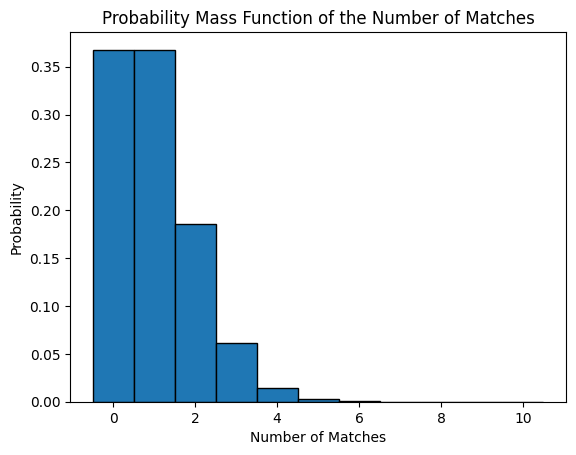

Mean number of matches: 0.9990
Variance of number of matches: 0.9933
Probability of at least 3 matches: 0.0790


In [62]:
import random
import numpy as np
import matplotlib.pyplot as plt

def matching_experiment(num_couples, num_simulations):
    matching_counts = [
        sum(p1 == p2 for p1, p2 in zip(range(num_couples), random.sample(range(num_couples), num_couples)))
        for _ in range(num_simulations)
    ]

    return matching_counts

# Number of couples
num_couples = 10

# Number of simulations
num_simulations = 100000

# Simulate the matching experiment
matching_counts = matching_experiment(num_couples, num_simulations)

# Plot the probability mass function (PMF) of the number of matches
plt.hist(matching_counts, bins=np.arange(num_couples + 2) - 0.5, density=True, align='mid', edgecolor='black')
plt.title('Probability Mass Function of the Number of Matches')
plt.xlabel('Number of Matches')
plt.ylabel('Probability')
plt.show()

# Calculate the mean and variance of the number of matches
mean_matches = np.mean(matching_counts)
variance_matches = np.var(matching_counts)

print(f"Mean number of matches: {mean_matches:.4f}")
print(f"Variance of number of matches: {variance_matches:.4f}")

# Calculate the probability of at least 3 matches
prob_at_least_3_matches = np.mean(np.array(matching_counts) >= 3)
print(f"Probability of at least 3 matches: {prob_at_least_3_matches:.4f}")
